In [21]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from utils.session_analysis import analyze_single_session,  analyze_all_sessions
from utils.correlation_analysis import run_permutation_test, categorise_neurons
from plot_functions import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:

all_sessions = [
    ('AV043', '2024-03-04'),
    ('AV043', '2024-03-05'),
    #('AV043', '2024-03-08'),# DLC for only 5 min
    #('AV043', '2024-03-11'),  # neural recordings start only half way through
    ('AV043', '2024-03-12'), # no spikes will use as behavior baseline
    ('AV043', '2024-03-13'),
    ('AV043', '2024-03-14'),
    ('AV043', '2024-03-26'), # no spikes will use as behavior baseline
    ('EB036', '2024-03-19'),
    ('EB036', '2024-03-20'),
    ('EB036', '2024-03-22'),
    ('EB037', '2024-03-20'),
    ('EB037', '2024-03-21'),
    ('EB037', '2024-03-22'),
    ('GB011', '2024-05-09'),
    #('GB011', '2024-05-10'), # wheel not at all visited in second half 
    ('GB011', '2024-05-14'),
    ('GB011', '2024-05-15'),
    ('GB011', '2024-05-16'),
    ('GB011', '2024-05-17'),
    ('GB012', '2024-06-19'),
    ('GB012', '2024-06-20'),
    ('GB012', '2024-06-21'),
    ('GB012', '2024-06-25'),
    ('GB012', '2024-07-11'), # no spikes will use as behavior baseline
    #('GB012', '2024-07-12'), DLC for only half the sesssion
    ('GB012', '2024-07-16'),  
]

In [ ]:
# adjust parameters here:
target_freq=10
run= False # set False for standard position-based mask, set True to analyze running bouts only
correlation= True
decoding= True
alpha= [0.1, 1, 10, 100, 500, 1000] # used for cross-validation in decoding analysis
leaveout= False # time-consuming, set to False for quick results 

results = analyze_all_sessions(all_sessions, target_freq, run, correlation, decoding, leaveout)

print(f"\nrun permutation test")
print("-" * 40)
run_permutation_test(results)

In [ ]:
# select example session (some sessions are behavioral controls and therefore not suitable for plotting; see all_sessions variable at script beginning)
e= 4
example = results[e]

# extract results 
metadata= example.metadata
behavior= example.behavior
correlations= example.correlations
decoding= example.decoding 

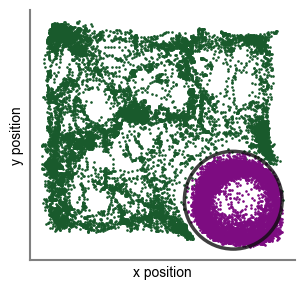

In [ ]:
# ROI classificaton 
plot_roi(metadata.roi_x, metadata.roi_y, metadata.roi_radius, behavior.mouse_x, behavior.mouse_y, behavior.pos_arena, behavior.pos_wheel)

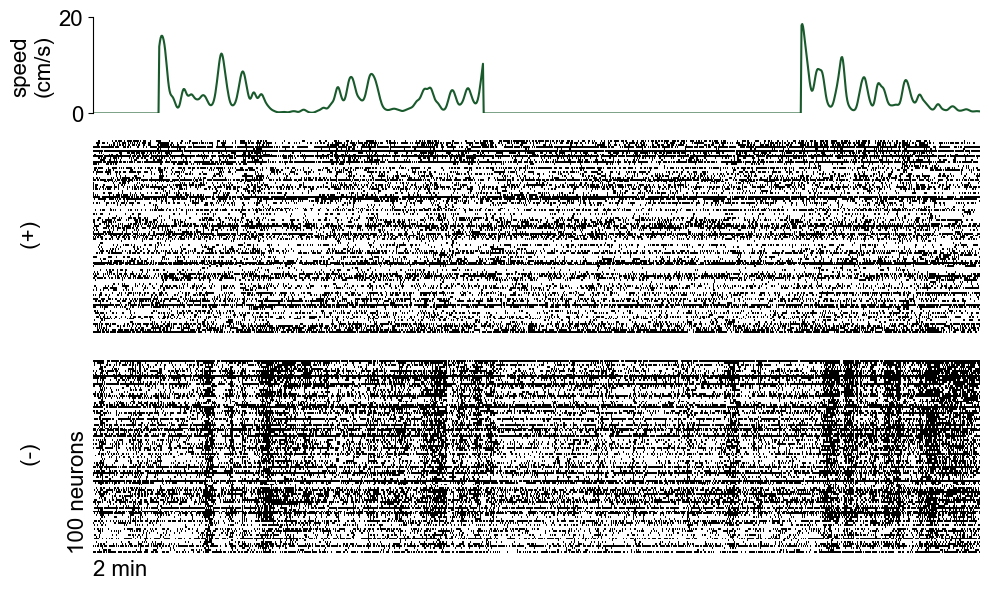

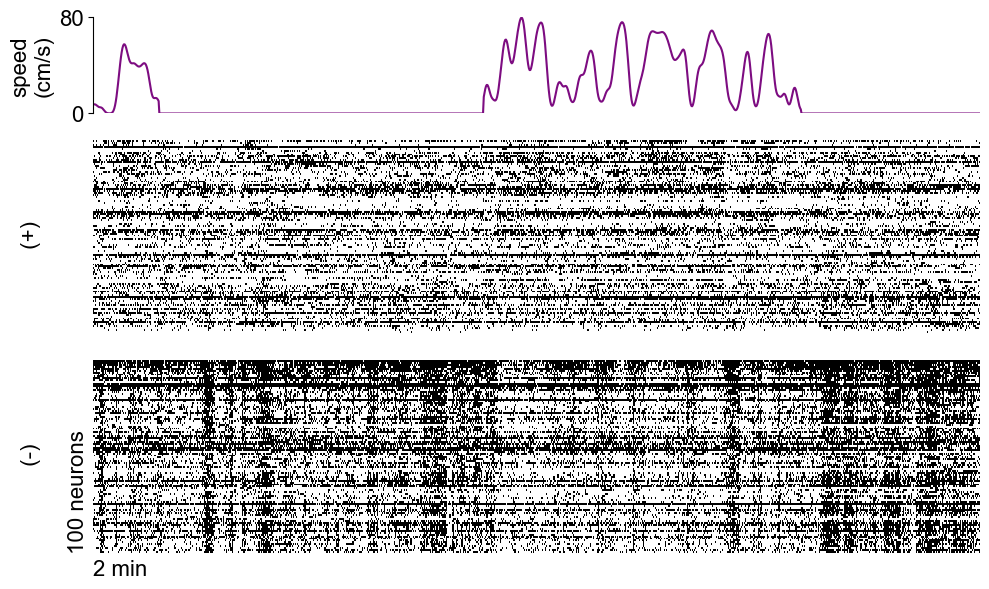

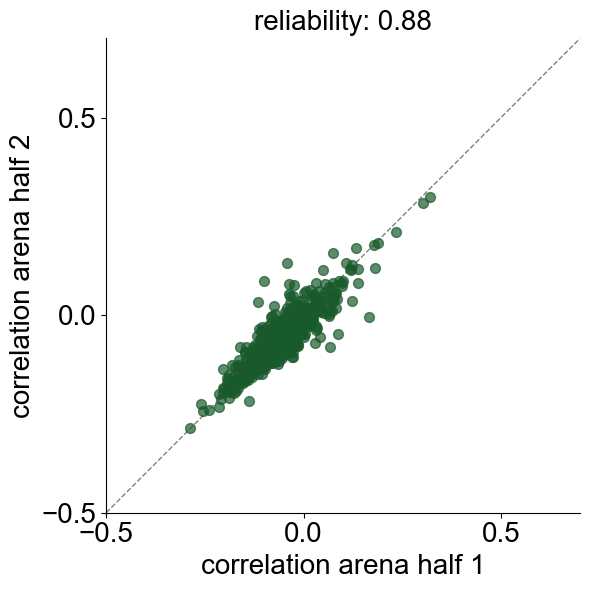

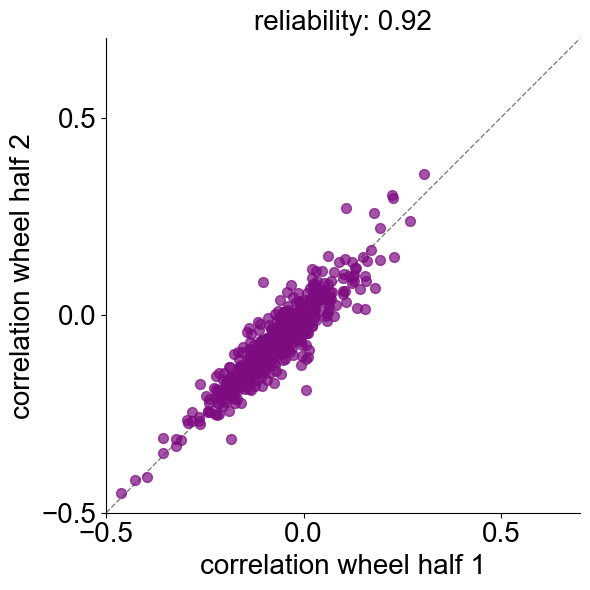

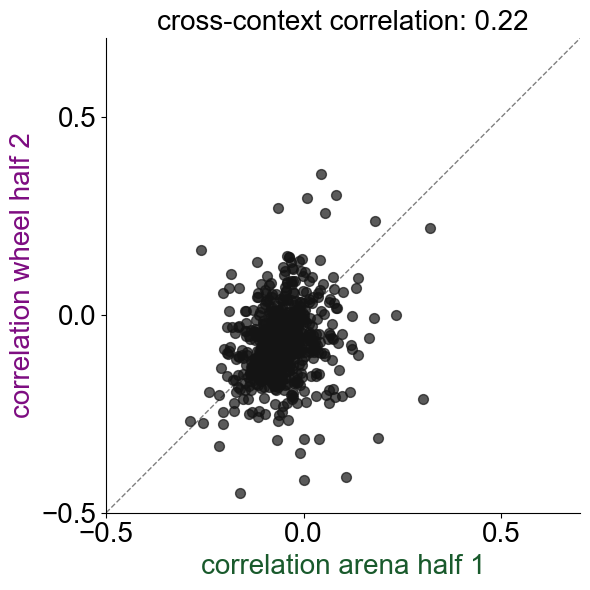

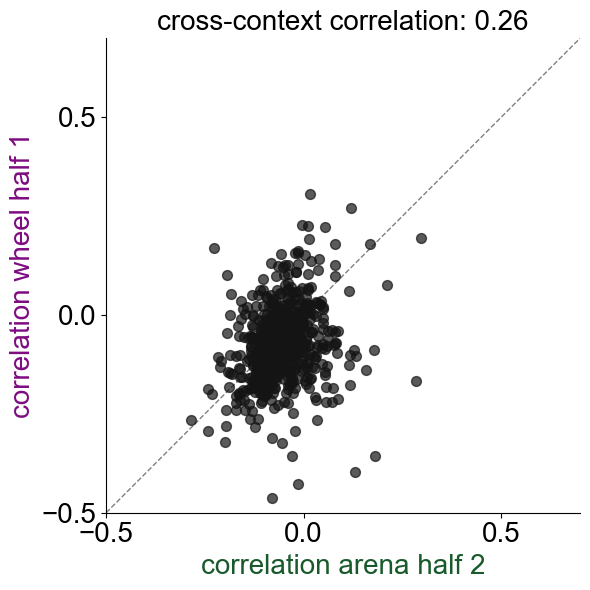

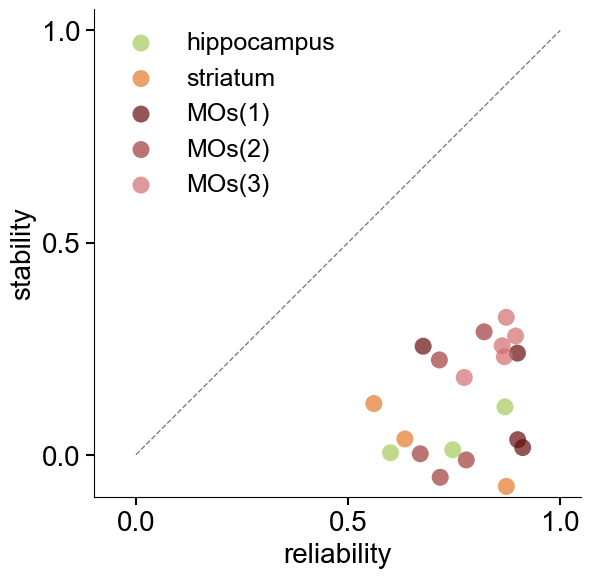

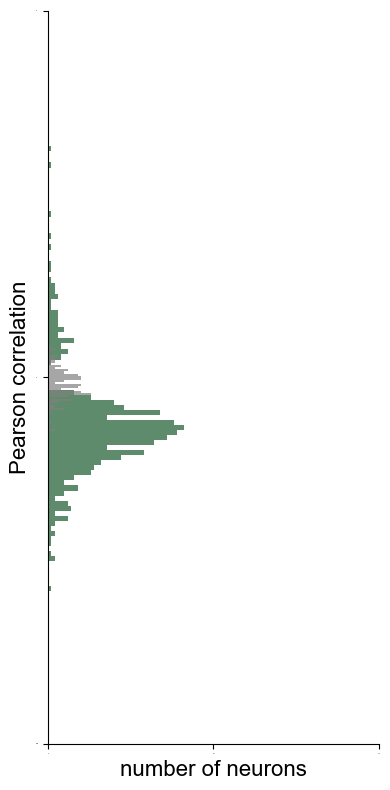

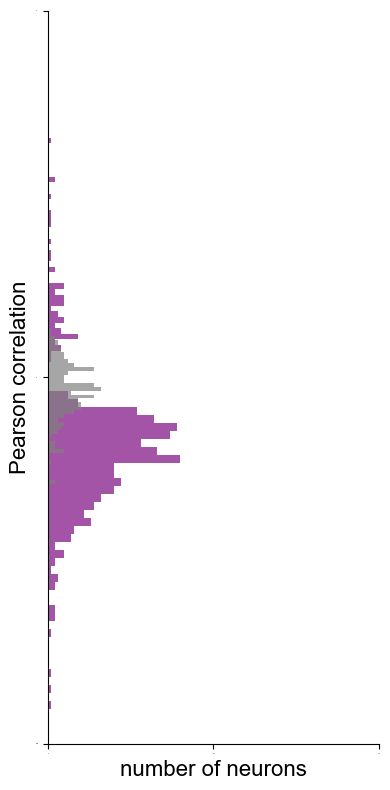

In [ ]:
# Correlation analysis

# plot correlation results for example session
if correlation:

    # adjust w_start and w_end to select time window for raster plots
    plot_raster_pos_neg(example.spike_counts, behavior.speed_arena, behavior.pos_arena, correlations.arena, w_start=3600, w_end=4800, n_neurons=100, color='#195A2C')
    plot_raster_pos_neg(example.spike_counts, behavior.speed_wheel, behavior.pos_wheel, correlations.wheel, w_start=3600, w_end=4800, n_neurons=100, color='#7D0C81')

    # correlation scatter plots for session halves
    plot_arena_reliability(correlations.arena_half1, correlations.arena_half2)
    plot_wheel_reliability(correlations.wheel_half1, correlations.wheel_half2)
    plot_arena_half1_vs_wheel_half2(correlations.arena_half1, correlations.wheel_half2)
    plot_arena_half2_vs_wheel_half1(correlations.arena_half2, correlations.wheel_half1)
    plot_reliability_stability(results)

    # plot distribution for example session

    plot_correlation_histogram(correlations.arena, example.permutation.p_vals.arena,color='#195A2C')
    plot_correlation_histogram(correlations.wheel, example.permutation.p_vals.wheel,color='#7D0C81')



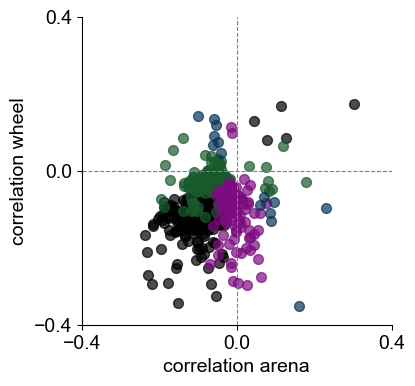

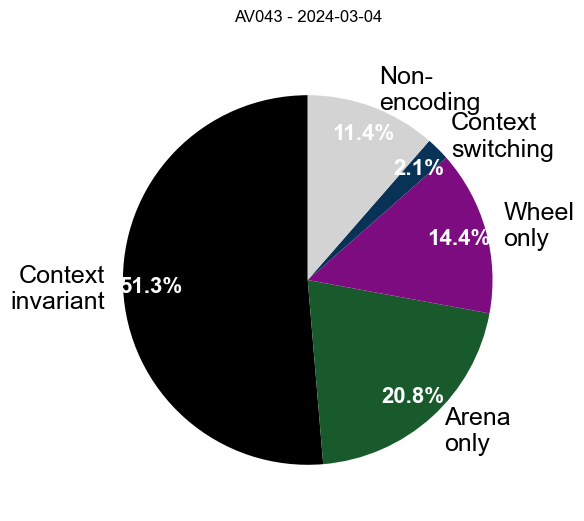

In [ ]:
# Categorise neurons based on correlation significance

categories= categorise_neurons(correlations.arena, correlations.wheel, example.permutation.significant.arena, example.permutation.significant.wheel)

# scatter and pie chart showing neuron classification based on correlation significance in both contexts
plot_category_scatter(example, categories)
plot_category_pie_chart(example, categories)

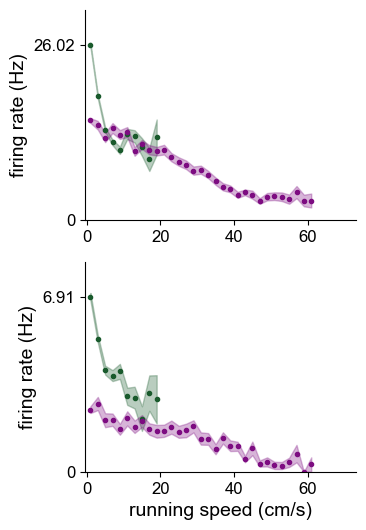

In [ ]:
# Speed Tuning analysis

# categories: "context-invariant", "arena-only", "wheel-only", "context-switching", "non-encoding"


category= "context-invariant" # select category to plot tuning curves for

# categories
from plot_functions import plot_speed_tuning
plot_speed_tuning(correlations.centers_arena, correlations.firing_rates_arena, correlations.sem_arena, correlations.centers_wheel, correlations.firing_rates_wheel, correlations.sem_wheel,
                      correlations.arena, correlations.wheel, example.permutation.significant.arena,  example.permutation.significant.wheel, behavior.speed_arena, behavior.speed_wheel,
                      category)


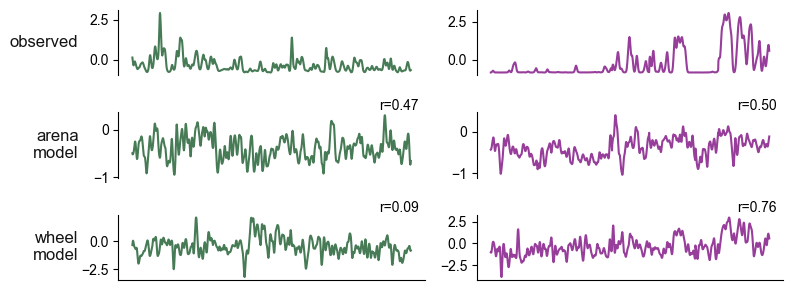

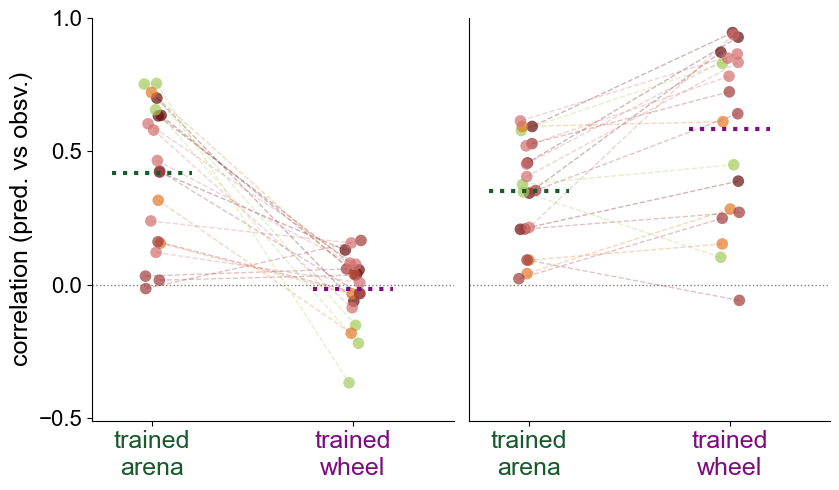

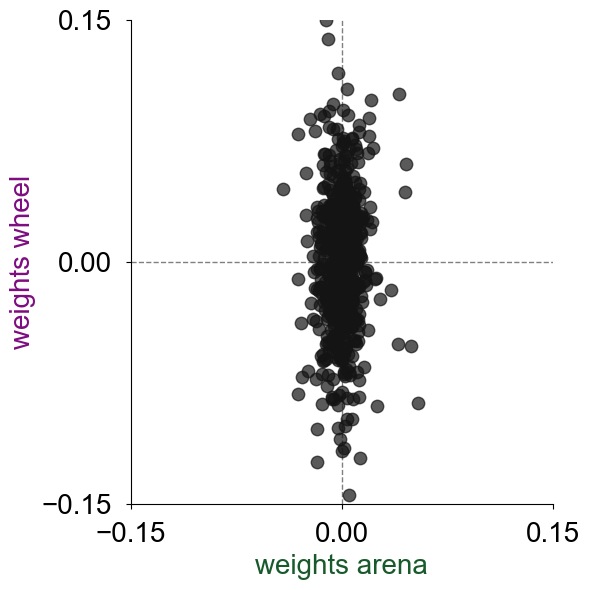

In [ ]:
# Decoding analysis

# plot decoding results for example session
if decoding: 

    # plot decoding predictions in arena and wheel test context (adjust w_start and w_end to select time window)
    plot_decoding_predictions(decoding.test_data.speed_arena, decoding.prediction.arena_to_arena, decoding.prediction.wheel_to_arena,decoding.test_data.speed_wheel,
                               decoding.prediction.wheel_to_wheel, decoding.prediction.arena_to_wheel, w_start=0, w_end=1200)

    # compare decoding performance within- and cross-context for both test contexts
    plot_decoding_performance_comparison(results)

    # weight correlation
    plot_weight_correlation(decoding.weights.arena, decoding.weights.wheel)

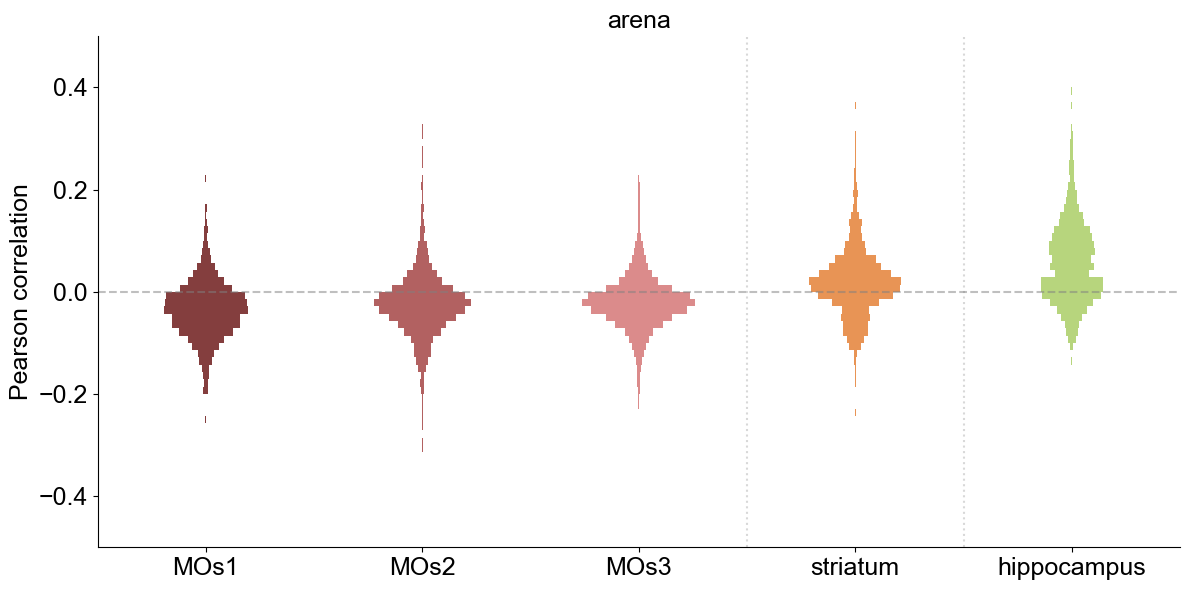

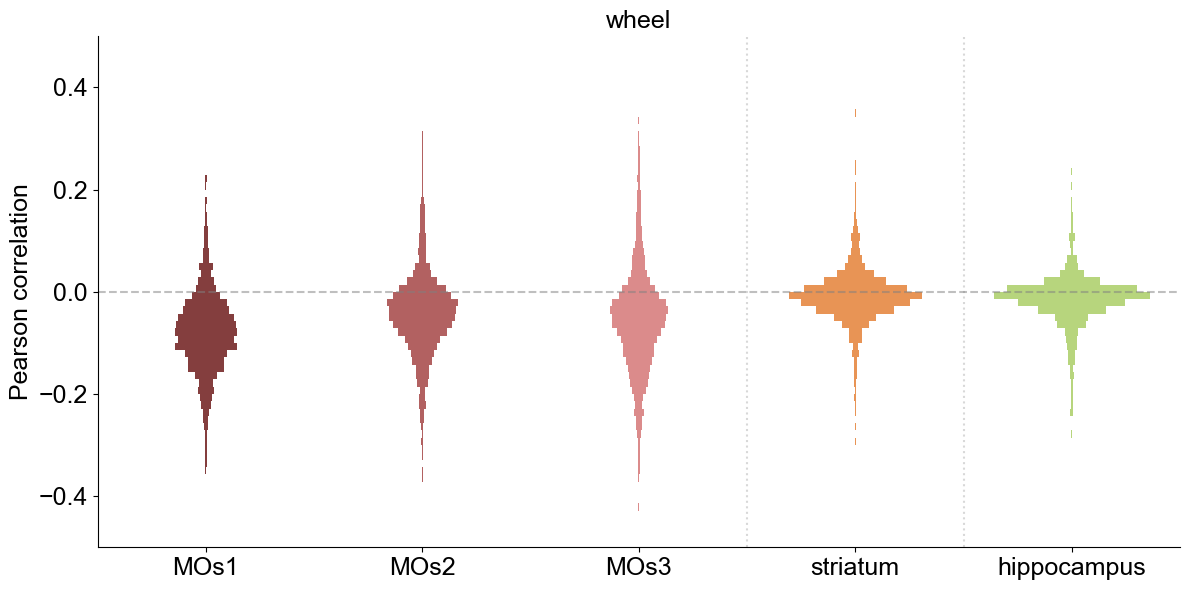

In [ ]:
# Brain regions

# plot correlation distributions within each context for each brain region
plot_correlation_distributions(results, "arena")
plot_correlation_distributions(results, "wheel")



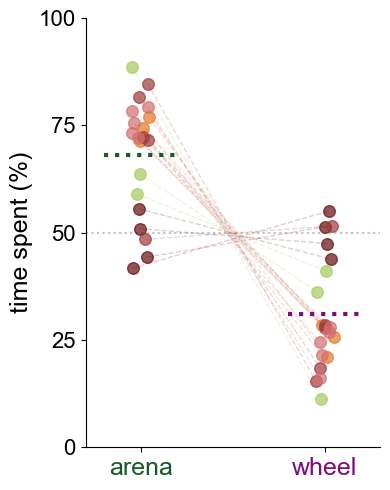

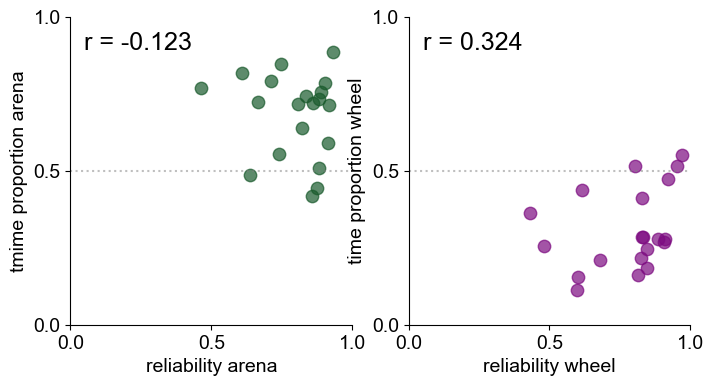

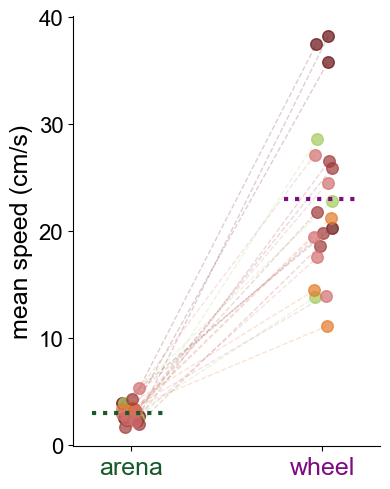

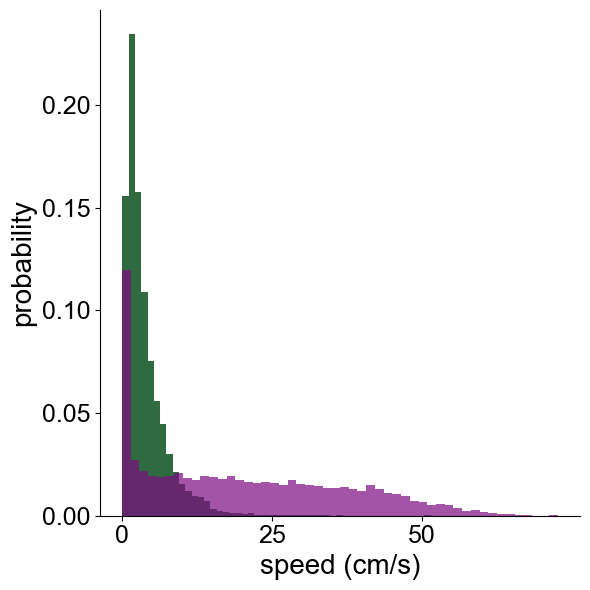

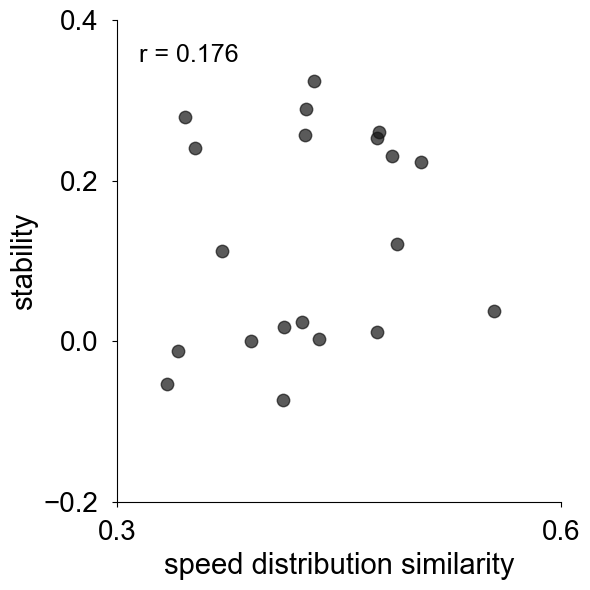

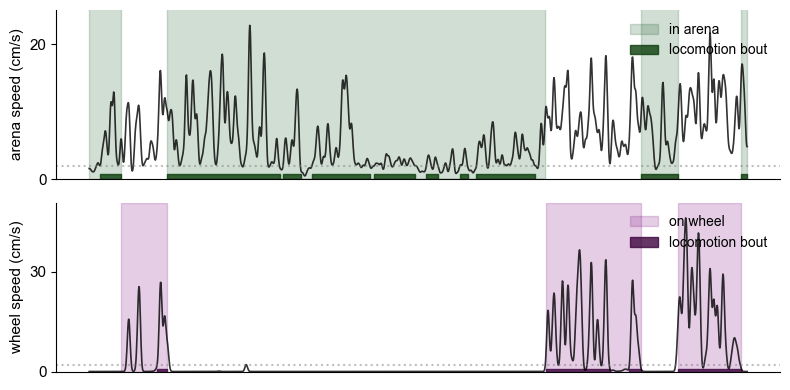

In [ ]:
# Control analysis

# plot time spent in each context for each subject
plot_context_preference(results)

# scatter of reliability in context for session against time spent in context 
plot_reliability_occupation(results)

# plot mean speed in each context for each subject 
plot_mean_speed_comparison(results)

# plot speed distribution for each context for an example session
plot_context_speed_distributions(behavior.speed_arena, behavior.speed_wheel, behavior.pos_arena, behavior.pos_wheel)

# scatter of stability for session against similarity between speed distributions
plot_stability_speed_distribution_similarity(results, run)

# speed trace with indicated locomotion bouts (adjust w_start and w_end to select time window)
plot_locomotion_detection(example.behavior,w_start= 0,w_end= 1800)

In [ ]:
### for quick plots: analyze single example session only ###

# adjust parameters here:
target_freq=10
subject_id = 'AV043'
date='2024-03-05'
correlation= True
decoding= True
alpha= [0.1, 1, 10, 100, 500, 1000]
leaveout= False # time-consuming, set to False for quick results
result = analyze_single_session(subject_id, date, target_freq, correlation, decoding, leaveout)
metadata = result.metadata
behavior= result.behavior
correlation= result.correlations
decoding= result.decoding



In [ ]:
# ROI classificaton 
plot_roi(metadata.roi_x, metadata.roi_y, metadata.roi_radius, behavior.mouse_x, behavior.mouse_y, behavior.pos_arena, behavior.pos_wheel)

# Correlation analysis

# plot correlation results for example session
if correlation:

    # adjust w_start and w_end to select time window for raster plots
    plot_raster_pos_neg(example.spike_counts, behavior.speed_arena, behavior.pos_arena, correlations.arena, w_start=3600, w_end=4800, n_neurons=100, color='#195A2C')
    plot_raster_pos_neg(example.spike_counts, behavior.speed_wheel, behavior.pos_wheel, correlations.wheel, w_start=3600, w_end=4800, n_neurons=100, color='#7D0C81')

    # correlation scatter plots for session halves
    plot_arena_reliability(correlations.arena_half1, correlations.arena_half2)
    plot_wheel_reliability(correlations.wheel_half1, correlations.wheel_half2)
    plot_arena_half1_vs_wheel_half2(correlations.arena_half1, correlations.wheel_half2)
    plot_arena_half2_vs_wheel_half1(correlations.arena_half2, correlations.wheel_half1)

    # plot correlation 
    plot_correlation_histogram(correlations.arena, example.permutation.p_vals.arena,color='#195A2C')
    plot_correlation_histogram(correlations.wheel, example.permutation.p_vals.wheel,color='#7D0C81')
    
    categories= categorise_neurons(correlations.arena, correlations.wheel, example.permutation.significant.arena, example.permutation.significant.wheel)
    # scatter and pie chart showing neuron classification based on correlation significance in both contexts
    plot_category_scatter(example, categories)
    plot_category_pie_chart(example, categories)



# Decoding analysis

# plot decoding results for example session
if decoding: 

    # plot decoding predictions in arena and wheel test context (adjust w_start and w_end to select time window)
    plot_decoding_predictions(decoding.test_data.speed_arena, decoding.prediction.arena_to_arena, decoding.prediction.wheel_to_arena,decoding.test_data.speed_wheel,
                               decoding.prediction.wheel_to_wheel, decoding.prediction.arena_to_wheel, w_start=0, w_end=1200)

    # weight correlation
    plot_weight_correlation(decoding.weights.arena, decoding.weights.wheel)

In [ ]:
### OPTIONAL: generate picture of video frame with annotated bodyparts and ROI ###

result = analyze_single_session('AV043', '2024-03-05', target_freq=60, correlation=True, decoding=False, leaveout=False)


No probe1 data found


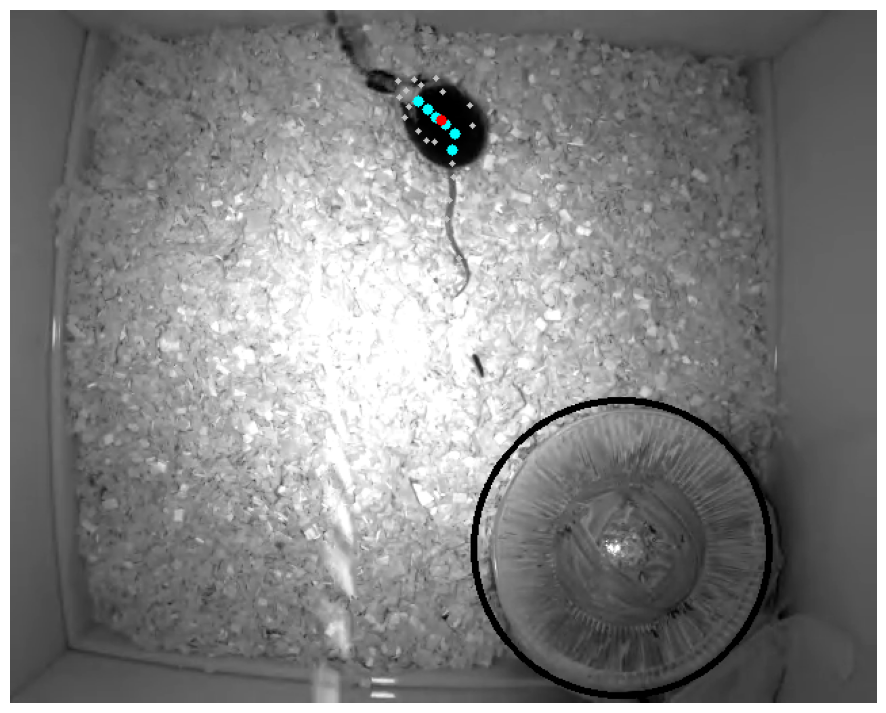

In [ ]:
frame_idx= result.metadata.exp_onset + 1000 # change to desired frame
selected_bodyparts = ['neck', 'mid_back', 'mouse_center', 'mid_backend', 'mid_backend2', 'mid_backend3']

plot_annotated_frame(result.metadata, result.behavior, selected_bodyparts, frame_idx)